## In this assignment students have to transform iris data into 3 dimensions
## and plot a 3d chart with transformed dimensions and colour each data
## point with specific class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [8]:
x = iris.data
y = iris.target

In [19]:
Y = pd.DataFrame(data = y, columns = ['Target'])

In [20]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [21]:
finalDf = pd.concat([principalDf, Y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,Target
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0


In [22]:
finalDf['Target'] = finalDf['Target'].map({0 : 'setosa', 1: 'versicolor', 2: 'virginica'})

In [23]:
finalDf['Target'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Target, dtype: int64

In [18]:
x_vals = finalDf['principal component 1']
y_vals = finalDf['principal component 2']
z_vals = finalDf['principal component 3']

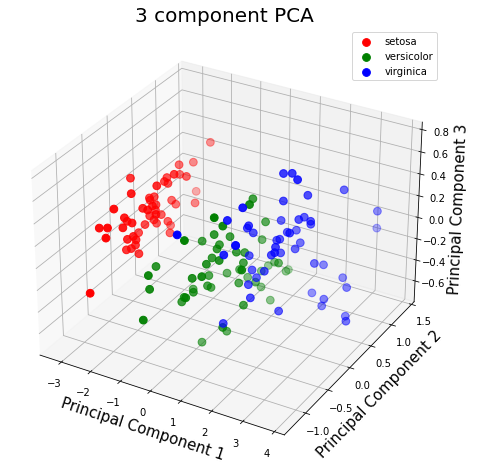

In [25]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target,color in zip(targets, colors):
    rowstokeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[rowstokeep, 'principal component 1'],
              finalDf.loc[rowstokeep, 'principal component 2'],
              finalDf.loc[rowstokeep, 'principal component 3'],
              c = color,
              s = 60)
ax.legend(targets)
ax.grid()
plt.show()
